# BEN!!
I begin coding in chunk 14! the rest is the same as the intial one in github. I used the clean data set. 

In [85]:

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [86]:
# Read in the data:

base_df = pd.read_csv("nutrients_csvfile.csv")

len(base_df['Category'].unique())

12

In [87]:
# Quick column check:
base_df.columns

Index(['Food', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber',
       'Carbs', 'Category'],
      dtype='object')

In [88]:
base_df['Category'].unique()

array(['Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',
       'Fish, Seafood', 'Vegetables', 'Fruits',
       'Breads, cereals, fastfood,grains', 'Soups', 'Desserts, sweets',
       'Jams, Jellies', 'Seeds and Nuts', 'Drinks,Alcohol, Beverages'],
      dtype=object)

In [6]:
base_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [7]:
# Typecheck:

base_df.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [8]:
base_df['Fat'].min()

'0'

In [90]:
# Transform the numeric columns into the right format:

cols = base_df.columns.drop(['Food','Category'])
base_df[cols] = base_df[cols].apply(pd.to_numeric, errors='coerce')

In [91]:
# Fill the NA's with 0's for now (THIS IS WRONG, NEED TO DO IT differently later on!!!!)
base_df[cols] = base_df[cols].fillna(0)

In [92]:
# Example for a plotly express graph:

fig = px.scatter(
    base_df,
    x="Grams",
    y="Calories",
    size="Fat",
    color="Category",
    hover_name="Protein",
    log_x=True,
    size_max=60,
)
fig

In [13]:
# A few design examples (for more infos about this dash markdown look at dash html)

app = dash.Dash()

app.layout = html.Div([
    html.Div(children=[
        # Label
        html.Label('Dropdown'),
        # Dropdown
        dcc.Dropdown(cols, 'Grams', id='demo-dropdown'),
        # Output Container
        html.Div(id='dd-output-container'),
        # Break a line
        html.Br(),
        html.Label('Multi-Select Dropdown'),
        # Dropdown with multple choices
        dcc.Dropdown(cols, multi=True),

        html.Br(),
        html.Label('Radio Items'),
        # Radio items
        dcc.RadioItems(base_df['Category'].unique(), 'Dairy products'),
        
        html.Label('Test Image'),

        html.Br(),
        html.Br(),
        html.Label('Here is a little Test Image based on Pandas'),

        html.Br(),
        html.Br(),
        # A graph <----- THIS IS WHAT YOU SHOULD DO FIRST (make a graph, interactivity later)
        dcc.Graph(id="Test-ID", figure = fig),
    
    ], style={'padding': 10, 'flex': 1}),

    html.Div(children=[
        html.Label('Checkboxes'),
        # Checklist
        dcc.Checklist(cols,
                      ['Protein']
        ),

        html.Br(),
        html.Label('Text Input'),
        dcc.Input(value='Something Something', type='text'),

        html.Br(),
        html.Label('Slider'),
        # Slider
        dcc.Slider(
            min=0,
            max=9,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},
            value=5,
        ),
    ], style={'padding': 10, 'flex': 1}),

##############################################
#  This is one element you can freely fill   #
##############################################
    
    html.Div(children=[
        html.H1('Copy this Block, Joe. :)'),
        html.H2('Oh look, I can do some stuff here'),
        dcc.RadioItems(['Adam', 'Ben', 'Joe', 'Marlene', 'Olive'], 'Adam')
    ], style={'padding': 10, 'flex': 1})
    
##############################################
#  It ends here                              #
##############################################

])
    


     

In [14]:
# Callback for the interactive parts:

@app.callback(
    Output('dd-output-container', 'children'),
    Input('demo-dropdown', 'value')
)
def update_output(value):
    return f'You have selected {value}'

In [15]:
# Run the App:

if __name__ == '__main__':
    app.run_server(port='8050')

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_7_0m1670432581.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/deps/react@16.v2_7_0m1670432581.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_7_0m1670432581.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_7_0m1670432581.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_7_0m1670432581.min.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_7_0m1670432581.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2022 09:13:50] "GET /_dash-component-suites/d

In [159]:
#make new DF that groups by Category to then make bar graphs

#prep data
df = base_df[['Calories', 'Category', 'Fat', 'Protein', 'Carbs', 'Fiber']].groupby('Category').apply(lambda x:x.mean())
df.sort_values('Calories', inplace = True)
df.reset_index(inplace=True)

#Fix the amount of decimals shown 
df= df.round(decimals=2)

df

,Category,Calories,Fat,Protein,Carbs,Fiber
0,Soups,47.59,1.64,2.36,6.20,0.16
1,"Drinks,Alcohol, Beverages",56.45,0.00,0.00,4.62,0.00
2,Vegetables,64.52,1.40,2.58,11.05,0.88
3,Fruits,86.99,0.93,0.79,20.81,0.84
4,"Fish, Seafood",157.74,11.79,26.62,6.86,5.38
5,Dairy products,206.27,12.98,12.12,10.04,0.09
6,"Jams, Jellies",272.65,0.00,0.00,69.61,5.00
7,"Desserts, sweets",281.98,6.76,3.00,53.09,0.43
8,"Breads, cereals, fastfood,grains",291.84,5.51,8.88,51.03,1.25
9,"Meat, Poultry",314.16,23.27,21.24,1.27,0.00


In [158]:
#import statements 
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# BEN! 
The first graph does not need to be added. keeping here for code ref. for others. 


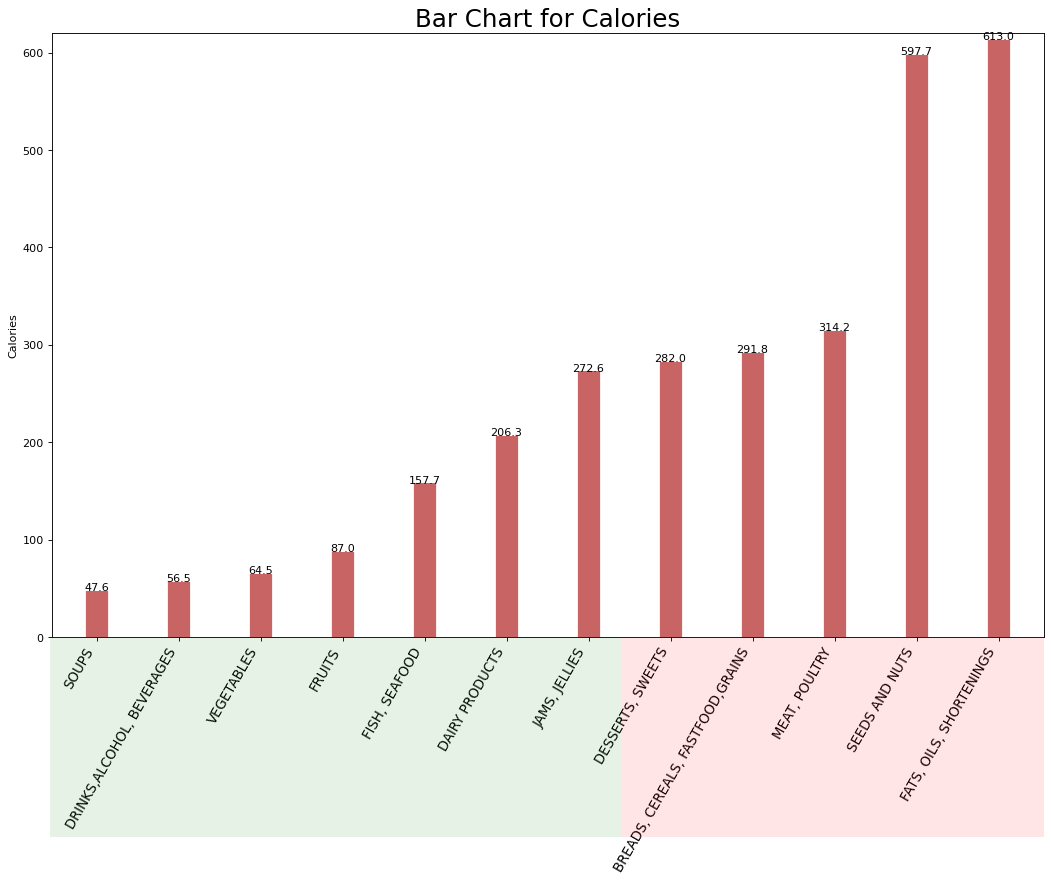

In [137]:
#Bar chart of mean calories by food Category 

#Draw plot
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.Calories, color='firebrick', alpha=0.7, linewidth=20)

#annotate text
for i, Calories in enumerate(df.Calories):
    ax.text(i, Calories+0.5, round(Calories, 1), horizontalalignment='center')
    
# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Calories', fontdict={'size':22})
ax.set(ylabel='Calories', ylim=(0, 620))
plt.xticks(df.index, df.Category.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.125), width=.33, height=.25, alpha=.1, facecolor='red', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.125), width=.446, height=.25, alpha=.1, facecolor='green', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [138]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Initialize a figure with ff.create_table(table_data)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
fig = ff.create_table(df, height_constant=30,colorscale=colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10

#Add graph
trace1 = go.Bar(x=df.Category, y=df.Calories,
                xaxis = 'x2', yaxis = 'y2', 
               marker=dict(color='#4d004c'),
               name = "Calories")

#Add trace data to fig
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Calories'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Average Caloric Make by Food Type'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':900})

fig


# BEN! HI! 
The two chunks bellow show the same info but displayed differently The second chunk is preffered if possible.


In [155]:
# Initialize a figure with ff.create_table(table_data)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
fig = ff.create_table(df, height_constant=70,colorscale=colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10
    
#Make traces 
fiber = go.Bar(x = df.Category, y=df.Fiber, 
                 marker = dict(color = '#000000'), 
                 name ='Fiber',
                 xaxis = 'x2', yaxis = 'y2')

fats = go.Bar(x = df.Category,y= df.Fat, 
                 marker = dict(color = '#4f009a'),
                 name ='Fat',
                 xaxis = 'x2', yaxis = 'y2')
protein = go.Bar(x = df.Category, y=df.Protein, 
                 marker = dict(color = '#9a0098'),
                 name ='Protein',
                 xaxis = 'x2', yaxis = 'y2')
carbs = go.Bar(x = df.Category, y=df.Carbs, 
                 marker = dict(color = '#ff7775'),
                 name ='Carbs',
                 xaxis = 'x2', yaxis = 'y2')

#add traces to figure 
fig.add_traces([fats, protein, carbs, fiber])

#intialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Average Grams'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':40, 'b':0})
fig.layout.update({'title': 'Grams per Category'})

fig.update_layout(barmode='stack')

fig



In [157]:
# Initialize a figure with ff.create_table(table_data)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
fig = ff.create_table(df, height_constant=50,colorscale=colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10
    
#Make traces 
fiber = go.Bar(x = df.Category, y=df.Fiber, 
                 marker = dict(color = '#000000'), #ffc1fe
                 name ='Fiber',
                 xaxis = 'x2', yaxis = 'y2')

fats = go.Bar(x = df.Category,y= df.Fat, 
                 marker = dict(color = '#4f009a'),
                 name ='Fat',
                 xaxis = 'x2', yaxis = 'y2')
protein = go.Bar(x = df.Category, y=df.Protein, 
                 marker = dict(color = '#9a0098'),
                 name ='Protein',
                 xaxis = 'x2', yaxis = 'y2')
carbs = go.Bar(x = df.Category, y=df.Carbs, 
                 marker = dict(color = '#ff7775'),
                 name ='Carbs',
                 xaxis = 'x2', yaxis = 'y2')

#add traces to figure 
fig.add_traces([fats, protein, carbs, fiber])

#intialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})

fig.layout.yaxis2.update({'title': 'Average Grams'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':40, 'b':0})
fig.layout.update({'title': 'Grams per Category'})

fig.update_layout(barmode='stack')

fig

